t-SNE on mixtures

In [1]:
alpha = 0.2

Set environment

In [2]:
import numpy as np
import random

seed = 42

np.random.seed(42)
random.seed(42)

Load data

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

In [4]:
images = mnist.data.values.reshape(-1, 28, 28) / 127.5 - 1
labels = mnist.target.astype(int).values

images.shape, labels.shape

((70000, 28, 28), (70000,))

In [5]:
noise = np.random.normal(loc=0., scale=1., size=images.shape)
noised_images = alpha * images + (1 - alpha) * noise
noised_images = noised_images.reshape(-1, 784)

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=8)
tsne_embeddings = tsne.fit_transform(noised_images)

In [7]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_digits(x, y, images, ax, zoom=0.5):
    for xi, yi, img in zip(x, y, images):
        im = OffsetImage(img, zoom=zoom, cmap="gray")
        ab = AnnotationBbox(im, (xi, yi), frameon=False)
        ax.add_artist(ab)

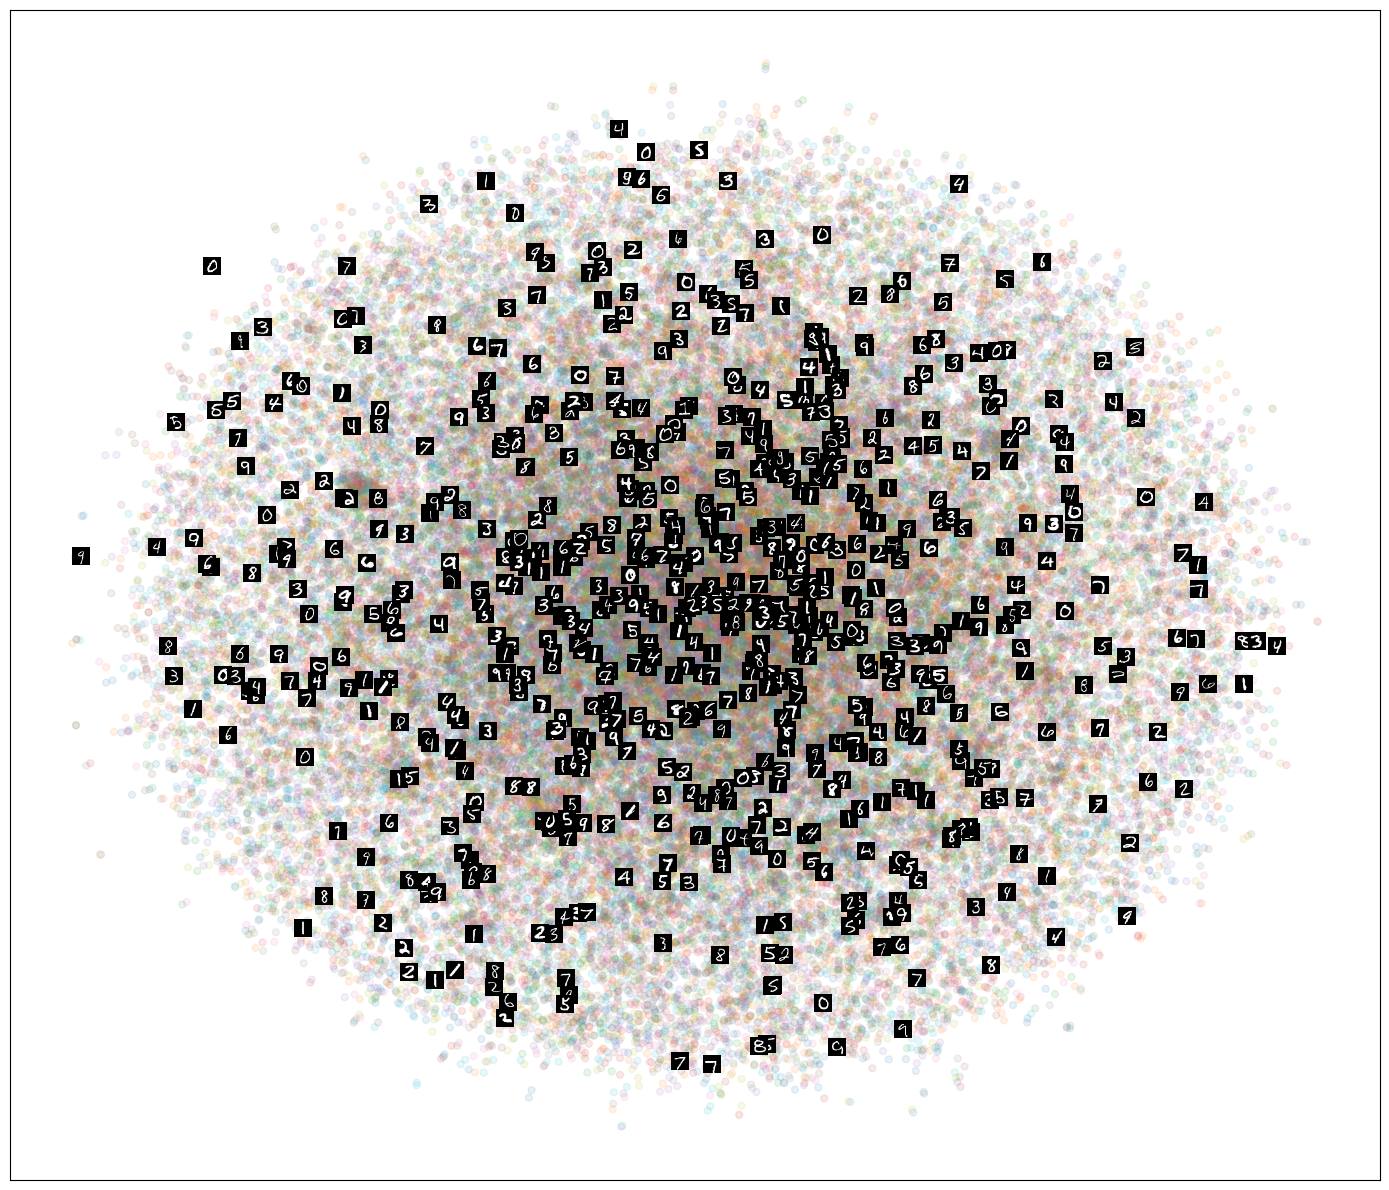

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))

scatter = ax.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], 
                     c=labels, cmap="tab10", alpha=0.1, s=25)

plot_digits(tsne_embeddings[::100, 0], 
            tsne_embeddings[::100, 1], 
            images[::100], 
            ax, zoom=0.45)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

---